# Get Results Fast with fastai

In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

![](../graphics/fastai-01.png)

## 1. The fastai Philosophy

- [fastai](https://www.fast.ai/) is a software package and course created by Jeremy Howard, Rachel Thomas, and Sylvain Gugger. 
- A good way to think about fastai is as a high level PyTorch wrapper library. If you're familiar with keras, **tensorflow is to keras and pytorch is (roughly) to fastai.**
- Unlike keras, fastai is **very opinionated** library. 
- Instead of creating a generic tools for deep learning experts to use, the fastai founders are creating courses and a library that make it **dramatically easier and faster** to get cutting-edge results quickly with deep learning. 
- One tool they use to accomplish this is by **encoding best practices from research directly into the library**. 
- This approach has led to some pretty dramatic results, including [training a model on imagenet in 18 minutes](https://www.fast.ai/2018/08/10/fastai-diu-imagenet/) and some breakthrough results in [pretraining models for natural language processing](https://arxiv.org/pdf/1801.06146.pdf). 
- Now, there are some trade-offs. In my experience, fastai can be buggy, difficult to debug, and challenging to generalize in some cases. 
- My thinking on these trade-offs, in late 2019, is this: 


1. For quickly exploring + testing top-performing models and new ideas on your own datasets, **it's hard to beat fastai**. In my experience, you'll be able to test lots of ideas quickly, and move fast. 
2. Having a reasonable good understanding of the underlying PyTorch code can make you much more effective with fastai, allowing you to "pick and choose" the parts of the fastai library you want to use, and what you want to implement yourself in PyTorch. 
3. I still really like Keras and Tensorflow, but I rarely use these libraries as **starting points** on new projects. 

---

## 2. Image Classification with fastai

- Let's train an image classifier with fastai!
- We'll go after **one of the first problems in comptuer vision**, the MIT summer vision project. 
- If you've spent any time with thhis [original computer vision problem](https://github.com/unccv/the_original_problem), then you konw that's it's alot more difficult than it appears!

![](../graphics/summer_project_goals-01.png)


- To use a deep learning approach, we'll need some data!
- We'll use what we're calling the **BBC-1k** dataset - 1000 images of bricks, balls, and cylinders!
- You can download the dataset [here](http://www.welchlabs.io/unccv/deep_learning/bbc_train.zip) - please unzip and place in the /data directory of this repo (gitigonored).
- Alternatively you can download with our helper tool: 

```
python util/get_and_unpack.py -url http://www.welchlabs.io/unccv/deep_learning/bbc_train.zip
mv bbc_train data
```

![](../graphics/bbc1k.gif)

### Optional in Lecture - let's code this part from scratch in an empty notebook.

In [9]:
%pylab inline
from fastai.vision import *
from pathlib import Path
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [10]:
path=Path('../data/bbc_train')

In [11]:
path.ls()

[PosixPath('../data/bbc_train/images'),
 PosixPath('../data/bbc_train/classification_labels.csv'),
 PosixPath('../data/bbc_train/bboxes.json'),
 PosixPath('../data/bbc_train/.DS_Store'),
 PosixPath('../data/bbc_train/masks')]

- The BBC-1k dataset inlcudes labels for classification, bounding box detection, and semantic segmentation. 
- Let's load the classification labels:

In [14]:
labels=pd.read_csv(path/'classification_labels.csv')

In [15]:
labels.head()

,filename,label,label_index
0,P2050936.jpg,ball,2
1,P2050922.jpg,ball,2
2,P2060163.jpg,brick,1
3,P2060003.jpg,ball,2
4,P2060017.jpg,ball,2


- fastai provides lots of methods for creating data iterators, called `DataBunches` in the fastai nomenclature
- `DataBunches` allow us to quickly create pipelines for loading data into randomized minibatches

In [16]:
data=ImageDataBunch.from_df(path=path/'images', df=labels, valid_pct=0.2, fn_col='filename', label_col='label', 
                            ds_tfms=get_transforms(), size=256, bs=64).normalize(imagenet_stats)

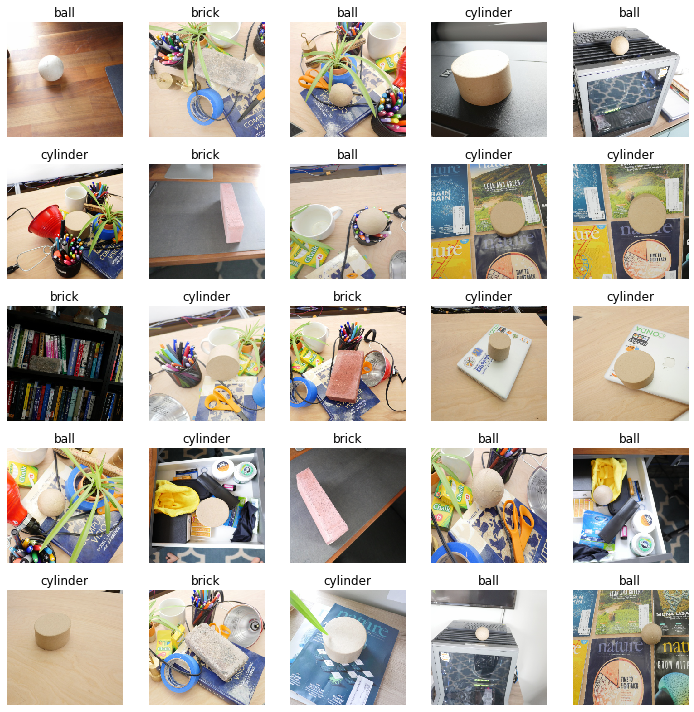

In [17]:
data.show_batch(figsize=(10,10))

- Creating a model is as simple as picking an architecture, passing in our `ImageDataBunch`, and choosing a performance metric!

In [18]:
learn=cnn_learner(data, models.resnet34, metrics=accuracy)

- By defualt, fastai downloads the weights for a pretrained model. 
- Usually when solving new problems, it's best to start with a pretrained model, and just train the last few layers on the new task. 
- We can do this by freezing the "model backbone": 

In [19]:
learn.freeze()

- Choosing a learning rate can be difficult. 
- fastai provides a great tool for selecting an effective learning rate, `learn.lr_find()`.
- `lr_find` takes steps using various learning rates, and measure the change in our loss function. 
- By plotting the loss as a function of learning rate, we can select an ideal learning rate. 
- Ideally, we want to pick a learning that maximizes the slope of our loss vs learning rate curve. 

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


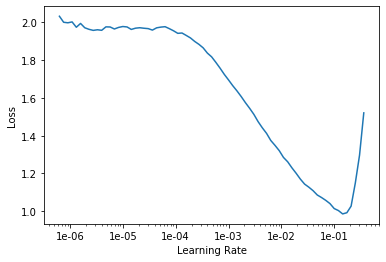

In [21]:
learn.recorder.plot()

- Fastai has a couple of other terrific built in features, **cylical learning rates**, and **differential learning rates**. 
- We're using each of these here, and will cover them in more detail later. 

In [22]:
lr=5e-3
learn.fit_one_cycle(4, slice(lr/10, lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.152437,0.296913,0.882979,00:11
1,0.730249,0.304593,0.925532,00:09
2,0.536673,0.180344,0.930851,00:10
3,0.399839,0.162292,0.930851,00:10


- We can further improve performance by training the whole model, not just our last few layers. 

In [26]:
learn.unfreeze()

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


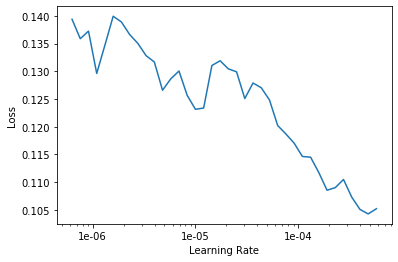

In [25]:
learn.recorder.plot()

In [27]:
lr=5e-5
learn.fit_one_cycle(8, slice(lr/10, lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.146724,0.146173,0.930851,00:11
1,0.135983,0.135950,0.941489,00:11
2,0.119503,0.120425,0.946809,00:11
3,0.108499,0.101764,0.962766,00:11
4,0.089172,0.086162,0.968085,00:11
5,0.079458,0.084296,0.973404,00:11
6,0.070610,0.081386,0.968085,00:11
7,0.064629,0.080395,0.973404,00:11


- fastai also has some really nice visualization & interpretation methonds

In [28]:
interp=ClassificationInterpretation.from_learner(learn)

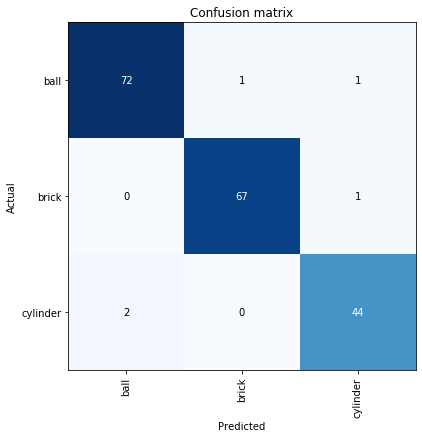

In [29]:
interp.plot_confusion_matrix(figsize=(6,6))

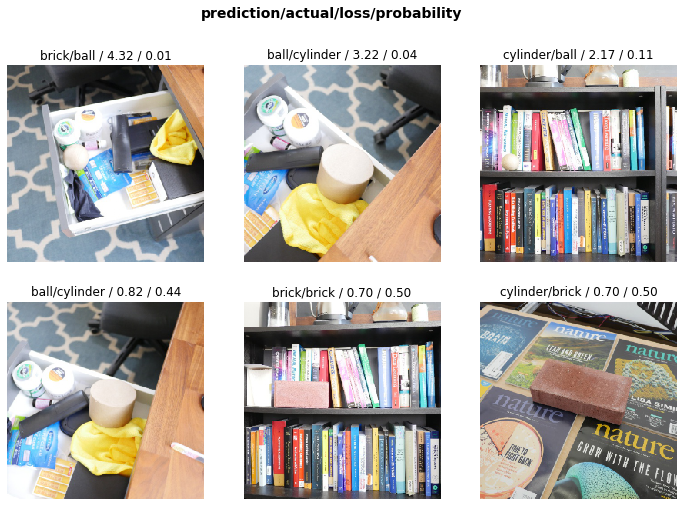

In [33]:
interp.plot_top_losses(k=6, figsize=(12, 8))

## 3. Object Detection with fastai

## 4. Semantic Segmentation with fastai